In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import reader1 as rd
import utilerias as utls
# Llamamos a la función antes de ejecutar el script
utls.eliminar_archivos_registro()

In [2]:
# url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
# dataset_train = pd.read_csv(url)
# training_set = dataset_train.iloc[:, 1:2].values

In [3]:
DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv'
cierre = rd.leer_archivo(DATOS).astype(float)
training_set_cierre = np.array(cierre[:int(len(cierre) * 0.7)])

training_set_cierre = np.reshape(training_set_cierre, (training_set_cierre.shape[0], 1))

In [4]:
# dataset_train.head()

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)

m_m_s = MinMaxScaler(feature_range=(0,1))
training_set_cierre_scaled = m_m_s.fit_transform(training_set_cierre)

In [6]:
time_steps = 8
N = len(training_set_cierre_scaled) #182
X_train_c = []
y_train_c = []
for i in range(time_steps, N):
    X_train_c.append(training_set_cierre_scaled[i-time_steps:i, 0])#toma paquetes de 8 en 8
    y_train_c.append(training_set_cierre_scaled[i, 0])#se toma el elemento 8+1
X_train_c, y_train_c = np.array(X_train_c), np.array(y_train_c)
X_train_c = np.reshape(X_train_c, (X_train_c.shape[0], X_train_c.shape[1], 1))

In [7]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.losses import mean_squared_error

In [8]:
#Se entrena con un aprendizaje por el profesor
red = Sequential()
red.add(LSTM(units=50,return_sequences=True,input_shape=(X_train_c.shape[1], 1)))#tiene un tamaño de entrada de 8 y de salida 1, input_shape = (8, 1)
red.add(Dropout(0.2))#Se apagan aleatoriamente el 20% de las neuronas de la capa anterior
red.add(LSTM(units=50,return_sequences=True))
red.add(Dropout(0.2))
red.add(LSTM(units=50,return_sequences=True))
red.add(Dropout(0.2))
red.add(LSTM(units=50))
red.add(Dropout(0.2))
red.add(Dense(units=1))
red.compile(optimizer=Adam(learning_rate=1e-3),loss='mean_squared_error')
history = red.fit(X_train_c,y_train_c,epochs=50,batch_size=32)

Epoch 1/50
6/6 [==============================] - 6s 10ms/step - loss: 0.4460
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1826
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0608
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0397
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0168
Epoch 11/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 12/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 13/50
6/6 [==============================] - 0s 8ms/step - los

[0.44600823521614075, 0.1825924664735794, 0.06079960986971855, 0.026904135942459106, 0.039745084941387177, 0.02308579348027706, 0.023010900244116783, 0.017792517319321632, 0.01799389347434044, 0.016816364601254463, 0.013679597526788712, 0.013359596021473408, 0.012417260557413101, 0.012305445969104767, 0.01183658093214035, 0.014396832324564457, 0.012172308750450611, 0.013182192109525204, 0.013205436058342457, 0.01087014377117157, 0.011712181381881237, 0.012033683247864246, 0.01308753527700901, 0.011715810745954514, 0.010555833578109741, 0.011890257708728313, 0.00898213591426611, 0.010885289870202541, 0.010491712018847466, 0.01073174923658371, 0.01170999277383089, 0.010599023662507534, 0.00972841214388609, 0.012833284214138985, 0.009400321170687675, 0.011115141212940216, 0.01028095930814743, 0.011524788103997707, 0.010120460763573647, 0.009032833389937878, 0.011165968142449856, 0.010503361001610756, 0.011862966232001781, 0.010288133285939693, 0.009890313260257244, 0.010895121842622757, 0

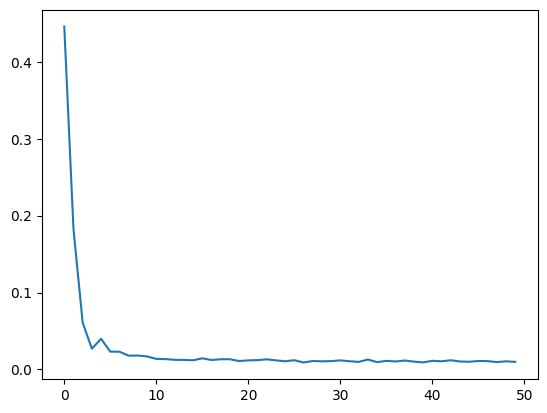

In [9]:
# Obtener la pérdida durante el entrenamiento
losses = history.history['loss']
print(losses)
plt.plot(range(len(losses)),losses)
plt.show()

In [10]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values



In [11]:
real_stock_price_cierre = cierre[int(len(cierre) * 0.7):]
real_stock_price_cierre = np.reshape(real_stock_price_cierre, (real_stock_price_cierre.shape[0], 1))

In [12]:
# print(dataset_train['Open'])
# print(dataset_test['Open'])
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# # print(f"dataset_total: {dataset_total}, len: {len(dataset_total)}")
# # print(len(dataset_total) - len(dataset_test) - 60)
# #print(dataset_total)

# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values#toma los primeros 76 elementos del dataset_total (que son los de entrenamiento)
# print(type(dataset_total))
# #le quita el conjunto de prueba - los ultimos 60 datos de entrenamiento
# # print(f"inputs: {inputs}, len: {len(inputs)}")
# print(f"inputs.shape {inputs.shape}")

# inputs = inputs.reshape(-1,1)
# print(f"inputs.shape {inputs.shape}")
# inputs = sc.transform(inputs)
# X_test = []
# for i in range(60, 76):
#     X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_stock_price = model.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [13]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_steps:].values

inputs_cierre = cierre[len(cierre) - len(real_stock_price_cierre) - time_steps:]#toma los ultimos 86 elementos, los ultimos 8 de entrenamiento y todos los de prueba  
#print(len(cierre) - len(real_stock_price_cierre) - time_steps)
inputs_cierre = np.array(inputs_cierre).reshape(-1,1)
#print(len(inputs_cierre))
#print(inputs_cierre.shape)
inputs_cierre = m_m_s.transform(inputs_cierre) # se normalizan los datos usandlo los parametros que se le dieron a m_m_s
X_test_cierre = []
for i in range(time_steps, len(inputs_cierre)):
    X_test_cierre.append(inputs_cierre[i-time_steps:i, 0]) # setoman en paquetes de 8 
X_test_cierre = np.array(X_test_cierre)
X_test_cierre = np.reshape(X_test_cierre, (X_test_cierre.shape[0], X_test_cierre.shape[1], 1))#(78, 8, 1)

predicted_stock_price_cierre = red.predict(X_test_cierre)
s_normalizar = predicted_stock_price_cierre
predicted_stock_price_cierre = m_m_s.inverse_transform(predicted_stock_price_cierre)

3/3 [==============================] - 1s 3ms/step


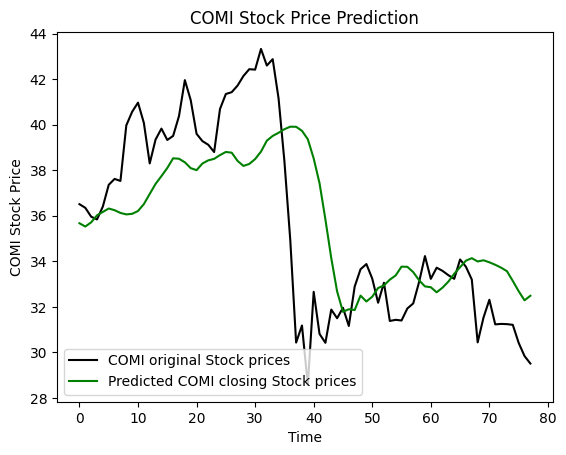

In [14]:
#La normalización funciona correctamente
plt.plot(real_stock_price_cierre, color = 'black', label = 'COMI original Stock prices')
plt.plot(predicted_stock_price_cierre, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

In [15]:
# print(y_train_c.size)
# plt.plot(y_train_c)
# plt.show()

In [27]:
ts_cierre_s_pred = training_set_cierre_scaled

loss_m = []
for epoch in range(100):  # Número de épocas
    ts_cierre_s_pred = training_set_cierre_scaled[:time_steps]#se obtienen los primeros time_steps(8) elementos del trainig set
    loss = []
    X_train_c_pred = []
    # print(f"grtrt: {ts_cierre_s_pred}")
    for i in range(time_steps, N):
        # Obtener las características y la etiqueta actual
        x_actual = ts_cierre_s_pred[i-time_steps:i,0]
        X_train_c_pred.append(x_actual)
        x_actual = x_actual.reshape(1,time_steps,1)

        y_actual = np.array([y_train_c[i-time_steps]])

        print(f"x_actual: {x_actual}")
        print(f"y_actual: {y_actual}")
        
        # Entrenar el modelo con las nuevas características y la etiqueta real
        #loss.append(red.train_on_batch(x_actual, y_actual))

        # Predicción del modelo
        #prediccion = red.predict(x_actual)#.reshape(1,1,1)
        prediccion = red(x_actual)
        
        # Agregar la predicción a las características para el siguiente paso
        # print(ts_cierre_s_pred)
        print(f"prediccion: {prediccion}")
        ts_cierre_s_pred = np.concatenate([ts_cierre_s_pred, prediccion])



    # print(f"mean: {np.mean(np.array(loss))}")
    # loss_m.append(np.mean(np.array(loss)))
    X_train_c_pred = np.array(X_train_c_pred)
    X_train_c_pred = np.reshape(X_train_c_pred, (X_train_c_pred.shape[0], X_train_c_pred.shape[1], 1))
    history = red.fit(X_train_c_pred, y_train_c, epochs=1, batch_size=32)
    loss = history.history['loss']
    loss_m.append(loss)
    #loss_m.append(mean_squared_error(training_set_cierre_scaled,ts_cierre_s_pred[:,0]))

x_actual: [[[0.12010849]
  [0.01975978]
  [0.        ]
  [0.01859744]
  [0.05656722]
  [0.02595893]
  [0.03448276]
  [0.04223169]]]
y_actual: [0.04610616]
prediccion: [[0.15625197]]
x_actual: [[[0.01975978]
  [0.        ]
  [0.01859744]
  [0.05656722]
  [0.02595893]
  [0.03448276]
  [0.04223169]
  [0.15625197]]]
y_actual: [0.10422317]
prediccion: [[0.1552393]]
x_actual: [[[0.        ]
  [0.01859744]
  [0.05656722]
  [0.02595893]
  [0.03448276]
  [0.04223169]
  [0.15625197]
  [0.1552393 ]]]
y_actual: [0.1542038]
prediccion: [[0.15567048]]
x_actual: [[[0.01859744]
  [0.05656722]
  [0.02595893]
  [0.03448276]
  [0.04223169]
  [0.15625197]
  [0.1552393 ]
  [0.15567048]]]
y_actual: [0.15575358]
prediccion: [[0.15661135]]
x_actual: [[[0.05656722]
  [0.02595893]
  [0.03448276]
  [0.04223169]
  [0.15625197]
  [0.1552393 ]
  [0.15567048]
  [0.15661135]]]
y_actual: [0.12553274]
prediccion: [[0.15758808]]
x_actual: [[[0.02595893]
  [0.03448276]
  [0.04223169]
  [0.15625197]
  [0.1552393 ]
  [0.15

In [17]:
# ts_cierre_s_pred = training_set_cierre_scaled
# sub_epocas = 1

# loss_m = []
# for epoch in range(30):  # Número de épocas
#     ts_cierre_s_pred = training_set_cierre_scaled[:time_steps]
#     loss = []
#     # print(f"grtrt: {ts_cierre_s_pred}")
#     for i in range(time_steps, N):#time_steps+1
#         # Obtener las características y la etiqueta actual
#         x_actual = ts_cierre_s_pred[i-time_steps:i,0].reshape(1,time_steps,1)
#         y_actual = np.array([y_train_c[i-time_steps]])

#         print(f"x_actual: {x_actual}")
#         print(f"y_actual: {y_actual}")
        

#         # Entrenar el modelo con las nuevas características y la etiqueta real
#         for sub_epoca in range(sub_epocas):
#             red.train_on_batch(x_actual, y_actual)
#             if(sub_epoca == sub_epocas - 1):
#                 loss.append(red.train_on_batch(x_actual, y_actual))

#         # Predicción del modelo
#         #prediccion = red.predict(x_actual)#.reshape(1,1,1)
#         prediccion = red(x_actual)
        
#         # Agregar la predicción a las características para el siguiente paso
#         # print(ts_cierre_s_pred)
#         print(f"prediccion: {prediccion}")
#         ts_cierre_s_pred = np.concatenate([ts_cierre_s_pred, prediccion])
#     print(f"mean: {np.mean(np.array(loss))}")
#     loss_m.append(np.mean(np.array(loss)))
#     #loss_m.append(mean_squared_error(training_set_cierre_scaled,ts_cierre_s_pred[:,0]))

In [18]:
# print(loss_m)
# plt.plot(range(len(loss_m)),loss_m)
# plt.show()
# losses = history.history['loss']
# print(losses)
# plt.plot(range(len(losses)),losses)
# plt.show()

In [29]:


# for i in range(time_steps, N):
#     X_train_c.append(training_set_cierre_scaled[i-time_steps:i, 0])#toma paquetes de 8 en 8
#     y_train_c.append(training_set_cierre_scaled[i, 0])#se toma el elemento 8+1

# Ahora, el modelo ha sido entrenado de manera iterativa

# print(X_test_cierre.shape)
# print(X_test_cierre[0,:].shape)
f_X_test_cierre = np.reshape(X_test_cierre[0,:], (1, X_test_cierre[0,:].shape[0], 1))
# print(f_X_test_cierre)
f_predicted_sp_cierre = red.predict(f_X_test_cierre)
print(f"shape: {predicted_stock_price_cierre.shape}")
f_predicted_sp_cierre = m_m_s.inverse_transform(f_predicted_sp_cierre)
# print(f_X_test_cierre.reshape(8))

predicted_stock_price_cierre_pred = utls.genera_prediccion_predictiva(f_X_test_cierre.reshape(8),8,78,red)
print(f"shape: {predicted_stock_price_cierre_pred.shape}")
temp = predicted_stock_price_cierre_pred
predicted_stock_price_cierre_pred = m_m_s.inverse_transform(predicted_stock_price_cierre_pred.reshape(86,1))
# input_shape_primera_capa = red.layers[0].input_shape
# print(input_shape_primera_capa[1:])

# arreglo_una_dimension = np.random.rand(8)  # Completa con tus valores reales

# # Utilizar input_shape_primera_capa en la función reshape
# arreglo_reshape = arreglo_una_dimension.reshape(1, *input_shape_primera_capa[1:])
# print(arreglo_reshape)


1/1 [==============================] - 0s 19ms/step
shape: (78, 1)
1/1 [==============================] - 0s 17ms/step
shape: (86,)


1/1 [==============================] - 0s 18ms/step


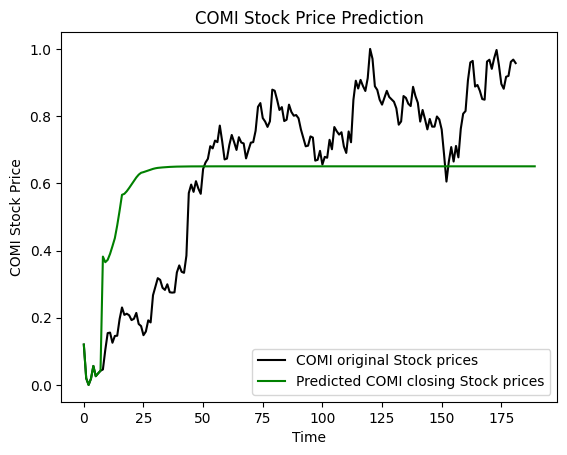

In [30]:
f_X_train_cierre = np.reshape(X_train_c[0,:], (1, X_train_c[0,:].shape[0], 1))
# # print(f_X_test_cierre)
# f_predicted_t_sp_cierre = red.predict(f_X_train_cierre)
# print(f"shape: {predicted_stock_price_cierre.shape}")
# f_predicted_sp_cierre = m_m_s.inverse_transform(f_predicted_t_sp_cierre)
# print(f_X_test_cierre.reshape(8))

predicted_stock_price_cierre_pred_t = utls.genera_prediccion_predictiva(f_X_train_cierre.reshape(8),8,182,red)
# print(f"shape: {predicted_stock_price_cierre_pred_t.shape}")
# temp_t = predicted_stock_price_cierre_pred_t
# predicted_stock_price_cierre_pred = m_m_s.inverse_transform(predicted_stock_price_cierre_pred.reshape(86,1))

#Sin normalizar
plt.plot(training_set_cierre_scaled, color = 'black', label = 'COMI original Stock prices')
plt.plot(predicted_stock_price_cierre_pred_t, color = 'green', label = 'Predicted COMI closing Stock prices') #ts_cierre_s_pred[:,0]
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

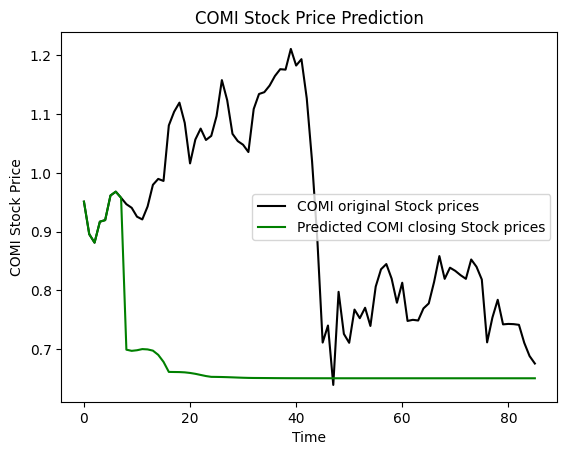

In [31]:
#Sin normalizar
plt.plot(inputs_cierre, color = 'black', label = 'COMI original Stock prices')
plt.plot(temp, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

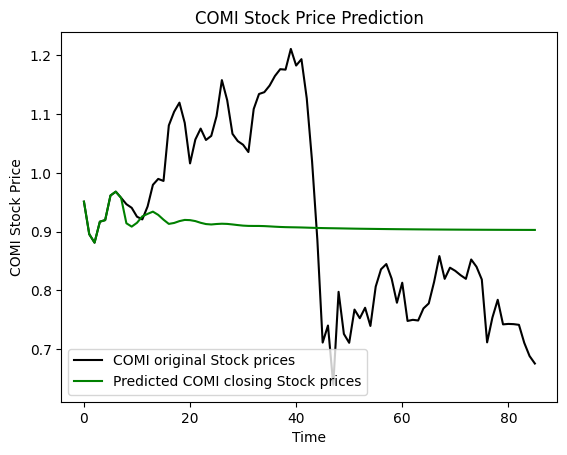

In [28]:
#Sin normalizar
plt.plot(inputs_cierre, color = 'black', label = 'COMI original Stock prices')
plt.plot(temp, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

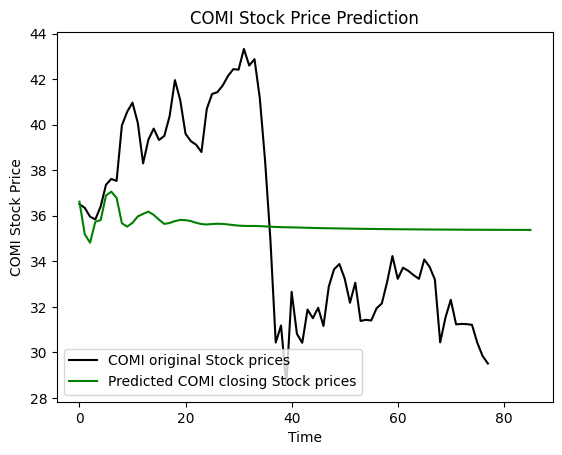

In [23]:

plt.plot(real_stock_price_cierre, color = 'black', label = 'COMI original Stock prices')
plt.plot(predicted_stock_price_cierre_pred, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

In [24]:
import torch
import torch.nn as nn
criterion = nn.MSELoss()
perdida = criterion(torch.tensor(real_stock_price_cierre),torch.tensor(predicted_stock_price_cierre))
print(perdida)
perdida = criterion(torch.tensor(real_stock_price_cierre),torch.tensor(predicted_stock_price_cierre_pred[:78]))
print(perdida)

tensor(9.6732, dtype=torch.float64)
tensor(16.7997, dtype=torch.float64)
